In [ ]:
import os
import cv2
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
def load_images_from_folder(base_folder):
    images = []
    labels = []
    for label in ["plastic", "no-plastic"]:
        folder = os.path.join(base_folder, label)
        for filename in os.listdir(folder):
            img_path = os.path.join(folder, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  
            if img is not None:
                img = cv2.resize(img, (128,128))
                img = img / 255.0 
                gray_centered = img - np.mean(img, axis=0)
                pca = PCA(n_components=60)
                transformed = pca.fit_transform(gray_centered)
                reconstructed = pca.inverse_transform(transformed)
                reconstructed += np.mean(img, axis=0)

                img_flattened = reconstructed.flatten()  
                images.append(img_flattened)
                labels.append(1 if label == "plastic" else 0)  
    return np.array(images), np.array(labels)

In [ ]:

X_train, y_train = load_images_from_folder("SOUVIK/train")
X_test, y_test = load_images_from_folder("SOUVIK/test")

In [ ]:
print(f"Treino: {X_train.shape}, Rótulos: {y_train.shape}")
print(f"Teste: {X_test.shape}, Rótulos: {y_test.shape}")

Treino: (1720, 16384), Rótulos: (1720,)
Teste: (430, 16384), Rótulos: (430,)


In [ ]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
y_pred = knn.predict(X_test)
class_rep = classification_report(y_test, y_pred)
print(f"Classification Report")
print(class_rep)

cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix")
print(cm)
print(f"TN: {cm[0][0]} | FN: {cm[0][1]} | FP: {cm[1][0]} | TP: {cm[1][1]}")

Classification Report
              precision    recall  f1-score   support

           0       0.67      0.75      0.71       220
           1       0.70      0.61      0.65       210

    accuracy                           0.68       430
   macro avg       0.69      0.68      0.68       430
weighted avg       0.69      0.68      0.68       430

Confusion Matrix
[[166  54]
 [ 82 128]]
TN: 166 | FN: 54 | FP: 82 | TP: 128


INDIVIDUAL TEST. CHANGE THE PATH TO INPUT IMAGES

0 IS NO_PLASTIC AND 1 IS PLASTIC

A imagem possui Lixo


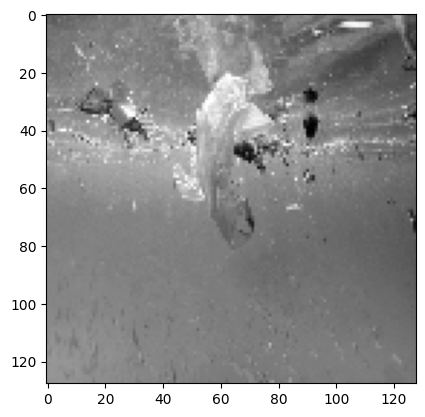

In [ ]:
img_teste = cv2.imread('teste-images/plastic2.png', cv2.IMREAD_GRAYSCALE)
img_teste = cv2.resize(img_teste, (128,128))
img_teste = img_teste / 255.0
gray_centered = img_teste - np.mean(img_teste, axis=0)
pca = PCA(n_components=50)
transformed = pca.fit_transform(gray_centered)
reconstructed = pca.inverse_transform(transformed)
reconstructed += np.mean(img_teste, axis=0)
img_flattened = reconstructed.flatten() 

print("A imagem não possui lixo" if knn.predict([img_flattened]) == 0 else "A imagem possui Lixo")
plt.imshow(img_teste, cmap='gray')